### use nlp environment

In [224]:
!python -V

Python 3.10.13


In [295]:
import requests
from bs4 import BeautifulSoup
import spacy
import yfinance as yf
import pandas as pd
import mplfinance as mpf

In [226]:
%pip list

Package                      Version        Editable project location
---------------------------- -------------- ---------------------------
absl-py                      2.1.0
accelerate                   0.26.0
aiohappyeyeballs             2.4.3
aiohttp                      3.11.8
aiosignal                    1.3.1
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-timeout                5.0.1
attrs                        24.2.0
beautifulsoup4               4.11.1
blis                         0.7.11
boto3                        1.35.71
botocore                     1.35.71
cachetools                   5.5.0
catalogue                    2.0.10
certifi                      2024.8.30
cffi                         1.17.1
charset-normalizer           3.4.0
click                        7.1.2
colorama                     0.4.6
coloredlogs                  15.0.1
comm                         0.2.2
contourpy                    1.3.0
cy

In [235]:
rss_url = "https://www.ft.com/myft/following/b2120a11-fbdf-494e-992c-1948e0e71113.rss"
#rss_url = "https://www.economist.com/finance-and-economics/rss.xml"
# rss_url = "https://www.economist.com/business/rss.xml"

In [236]:
nlp = spacy.load("en_core_web_sm")

In [237]:
response = requests.get(rss_url)

In [238]:
rss_feed = response.text

In [239]:
soup = BeautifulSoup(rss_feed, features="xml")

In [240]:
response = requests.get(rss_url)

if response.status_code == 200:
    rss_feed = response.text
    soup = BeautifulSoup(rss_feed, features="xml")
    entries = soup.find_all('title')
    if len(entries) > 0:
        title = entries[0]
        if title is not None:
            print(title.text)
        else:
            print("No title found in the first entry")
    else:
        print("No entry found in the RSS feed")
else:
    print("Failed to get RSS feed. Status code:", response.status_code)

myFT following


In [250]:
title = entries[5].text
print(title)

Ryanair calls for alcohol limit at EU airports


In [242]:
# split title into parts of speech tokens
processed_title = nlp(entries[1].text)
for token in processed_title:
    print(token)

Footloose
CFOs
need
not
scare
off
investors


In [251]:
# tag into 'parts of speech tokens'
processed_title = nlp(entries[5].text)
for token in processed_title:
    print(token.text, "---", token.pos_)

Ryanair --- PROPN
calls --- VERB
for --- ADP
alcohol --- NOUN
limit --- NOUN
at --- ADP
EU --- PROPN
airports --- NOUN


In [252]:
# tag into dependency graph
processed_title = nlp(entries[5].text)
for token in processed_title:
    print(token.text, "---", token.dep_)

Ryanair --- nsubj
calls --- ROOT
for --- prep
alcohol --- compound
limit --- pobj
at --- prep
EU --- compound
airports --- pobj


In [253]:
spacy.displacy.render(processed_title, style='dep',
jupyter=True, options={'distance': 120})

In [254]:
### entity extraction
spacy.displacy.render(processed_title,style='ent', jupyter=True,options={'distance': 120})

In [255]:
## Extract company names
#ent.py
companies = []
for title in entries:
    doc = nlp(title.text)
    for token in doc.ents:
        if token.label_ == 'ORG':
            companies.append(token.text)
        else:
            pass
companies

['LNG',
 'Venture Global',
 'EU',
 'Johnson & Johnson',
 'AI',
 'Goldman Sachs',
 'EU',
 'LNG',
 'Trump’s',
 'TikTok']

In [139]:
companies =['Bank of India']

In [82]:
stocks_df = pd.read_csv("../data/ind_nifty500list.csv")

# yfinance

In [256]:
import yfinance as yf

In [151]:
sbux = yf.Ticker("SBUX")
tlry = yf.Ticker("TLRY")

print(sbux.info['sector'])
print(tlry.info['sector'])

Consumer Cyclical
Healthcare


In [152]:
# sector
sbux.get_recommendations()

,period,strongBuy,buy,hold,sell,strongSell
0,0m,7,10,14,3,1
1,-1m,7,10,14,3,1
2,-2m,7,11,13,3,1
3,-3m,7,11,15,1,0


In [19]:
dir(yf)

['EquityQuery',
 'Industry',
 'Screener',
 'Search',
 'Sector',
 'Ticker',
 'Tickers',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'base',
 'cache',
 'const',
 'data',
 'domain',
 'download',
 'enable_debug_mode',
 'exceptions',
 'multi',
 'scrapers',
 'screener',
 'search',
 'set_tz_cache_location',
 'shared',
 'ticker',
 'tickers',
 'utils',
 'version',
 'warnings']

In [20]:
# create a ticker object
obj = yf.Ticker('goog')
obj

yfinance.Ticker object <GOOG>

In [21]:
dir(obj)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_analysis',
 '_data',
 '_download_options',
 '_earnings',
 '_earnings_dates',
 '_expirations',
 '_fast_info',
 '_fetch_ticker_tz',
 '_financials',
 '_fundamentals',
 '_funds_data',
 '_get_ticker_tz',
 '_holders',
 '_isin',
 '_lazy_load_price_history',
 '_news',
 '_options2df',
 '_price_history',
 '_quote',
 '_shares',
 '_tz',
 '_underlying',
 'actions',
 'analyst_price_targets',
 'balance_sheet',
 'balancesheet',
 'basic_info',
 'calendar',
 'capital_gains',
 'cash_flow',
 'cashflow',
 'dividends',
 'earnings',
 'earnings_dates',
 'earnings_estimate',
 'earnings_history',
 'eps_revisions',
 'eps_trend',
 'fast_info',
 'f

In [22]:
goog = yf.Ticker('goog')
data = goog.history()
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-11 00:00:00-05:00,186.699997,196.889999,186.259995,196.710007,41664500,0.0,0.0
2024-12-12 00:00:00-05:00,196.300003,196.705002,193.279999,193.630005,25197800,0.0,0.0
2024-12-13 00:00:00-05:00,192.710007,194.339996,191.259995,191.380005,18883200,0.0,0.0
2024-12-16 00:00:00-05:00,194.365005,200.639999,194.110001,198.160004,32248600,0.0,0.0
2024-12-17 00:00:00-05:00,198.529999,202.880005,196.690002,197.119995,24129500,0.0,0.0


In [23]:
data = goog.history(interval='1m', start='2022-01-03', end='2022-01-10')
data.head()

$GOOG: possibly delisted; no price data found  (1m 2022-01-03 -> 2022-01-10) (Yahoo error = "1m data not available for startTime=1641186000 and endTime=1641790800. The requested range must be within the last 30 days.")


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [24]:
data = yf.download(['GOOG','META'], period='1mo')
data.head()

[*********************100%***********************]  2 of 2 completed


Price            Close                    High                     Low  \
Ticker            GOOG        META        GOOG        META        GOOG   
Date                                                                     
2024-12-11  196.710007  632.170044  196.889999  637.885465  186.259995   
2024-12-12  193.630005  630.281555  196.705002  636.146819  193.279999   
2024-12-13  191.380005  619.849976  194.339996  630.571369  191.259995   
2024-12-16  198.160004  624.239990  200.639999  631.150024  194.110001   
2024-12-17  197.119995  619.440002  202.880005  632.369995  196.690002   

Price                         Open                Volume            
Ticker            META        GOOG        META      GOOG      META  
Date                                                                
2024-12-11  621.029068  186.699997  622.867550  41664500  10837200  
2024-12-12  626.704485  196.300003  630.991005  25197800   7474700  
2024-12-13  616.392803  192.710007  626.714434  18883200   8453300  
2024-12-16  618.580017  194.365005  629.979980  32248600  10885600  
2024-12-17  616.539978  198.529999  626.169983  24129500  12897800

In [25]:
dhr = yf.Ticker('DHR')
info = dhr.info
info.keys()

dict_keys(['address1', 'address2', 'city', 'state', 'zip', 'country', 'phone', 'fax', 'website', 'industry', 'industryKey', 'industryDisp', 'sector', 'sectorKey', 'sectorDisp', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'irWebsite', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trailingAnnualDivid

In [26]:
%env

{'ALLUSERSPROFILE': 'C:\\ProgramData',
 'APPDATA': 'C:\\Users\\marke\\AppData\\Roaming',
 'CHOCOLATEYINSTALL': 'C:\\ProgramData\\chocolatey',
 'CHOCOLATEYLASTPATHUPDATE': '133356252784264593',
 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
 'COMPUTERNAME': 'LAPTOP-SESHDH7F',
 'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe',
 'CONDA_DEFAULT_ENV': 'tf_env',
 'CONDA_EXE': 'C:\\Users\\marke\\anaconda3\\Scripts\\conda.exe',
 'CONDA_PROMPT_MODIFIER': '(tf_env) ',
 'CONDA_PYTHON_EXE': 'C:\\Users\\marke\\anaconda3\\python.exe',
 'CONDA_SHLVL': '1',
 'CUDA_PATH': 'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v12.1',
 'CUDA_PATH_V11_8': 'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.8',
 'CUDA_PATH_V12_1': 'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v12.1',
 'CUDA_PATH_V12_2': 'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUD

In [27]:
## collect various market attributes of a stock
stock_dict = {
    'Org': [],
    'Symbol': [],
    'currentPrice': [],
    'dayHigh': [],
    'dayLow': [],
    'forwardPE': [],
    'dividendYield': []
}

## for each company look it up and gather all market data on it
for company in companies:
    try:
        if stocks_df['Company Name'].str.contains(company).sum():
            symbol = stocks_df[stocks_df['Company Name'].\
                                str.contains(company)]['Symbol'].values[0]
            org_name = stocks_df[stocks_df['Company Name'].\
                                str.contains(company)]['Company Name'].values[0]
            stock_dict['Org'].append(org_name)
            stock_dict['Symbol'].append(symbol)
            stock_info = yf.Ticker(symbol+".NS").info
            stock_dict['currentPrice'].append(stock_info['currentPrice'])
            stock_dict['dayHigh'].append(stock_info['dayHigh'])
            stock_dict['dayLow'].append(stock_info['dayLow'])
            stock_dict['forwardPE'].append(stock_info['forwardPE'])
            stock_dict['dividendYield'].append(stock_info['dividendYield'])
        else:
            pass
    except:
        pass

## create a dataframe to display the buzzing stocks
pd.DataFrame(stock_dict)

,Org,Symbol,currentPrice,dayHigh,dayLow,forwardPE,dividendYield
0,Bank of India,BANKINDIA,94.27,98.7,94.0,5.186846,0.0297


In [28]:
symbol

'BANKINDIA'

In [29]:
org_name

'Bank of India'

In [30]:
yf.Ticker(symbol+".NS").info

{'address1': 'Star House - I',
 'address2': '8th Floor, East Wing C-5, G Block Bandra Kurla Complex, Bandra (East)',
 'city': 'Mumbai',
 'zip': '400051',
 'country': 'India',
 'phone': '91 22 6668 4490',
 'fax': '91 22 6668 4491',
 'website': 'https://bankofindia.co.in',
 'industry': 'Banks - Regional',
 'industryKey': 'banks-regional',
 'industryDisp': 'Banks - Regional',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'Bank of India Limited provides various banking products and services in India and internationally. It operates through Treasury, Wholesale Banking, and Retail Banking segments. The company accepts various deposit products, such as savings, salary, current, term, and rera account deposits. It also provides debit, credit, and prepaid cards; loan products, including personal, home, vehicle, education, loan against property, star reverse mortgage, and approved home projects loans; and financi

In [31]:
msft = yf.Ticker("MSFT")
print(msft.info)

{'address1': 'One Microsoft Way', 'city': 'Redmond', 'state': 'WA', 'zip': '98052-6399', 'country': 'United States', 'phone': '425 882 8080', 'website': 'https://www.microsoft.com', 'industry': 'Software - Infrastructure', 'industryKey': 'software-infrastructure', 'industryDisp': 'Software - Infrastructure', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power apps, and pow

# https://algotrading101.com/learn/yfinance-guide/

In [32]:
import yfinance as yf

apple= yf.Ticker("aapl")

Date
1987-06-16 00:00:00-04:00    2.0
2000-06-21 00:00:00-04:00    2.0
2005-02-28 00:00:00-05:00    2.0
2014-06-09 00:00:00-04:00    7.0
2020-08-31 00:00:00-04:00    4.0
Name: Stock Splits, dtype: float64

In [51]:
# show actions (dividends, splits)
apple.actions

,Dividends,Stock Splits
Date,,


In [52]:
# show dividends
apple.dividends

Series([], Name: Dividends, dtype: float64)

In [53]:
# show splits
apple.splits

Series([], Name: Stock Splits, dtype: float64)

In [33]:
apple

yfinance.Ticker object <AAPL>

In [34]:
apple_historical = apple.history(start="2024-12-01",end="2025-01-01",interval="1d")
apple_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-02 00:00:00-05:00,237.270004,240.789993,237.160004,239.589996,48137100,0.0,0.0
2024-12-03 00:00:00-05:00,239.809998,242.759995,238.899994,242.649994,38861000,0.0,0.0
2024-12-04 00:00:00-05:00,242.869995,244.110001,241.250000,243.009995,44383900,0.0,0.0
2024-12-05 00:00:00-05:00,243.990005,244.539993,242.130005,243.039993,40033900,0.0,0.0
2024-12-06 00:00:00-05:00,242.910004,244.630005,242.080002,242.839996,36870600,0.0,0.0
2024-12-09 00:00:00-05:00,241.830002,247.240005,241.750000,246.750000,44649200,0.0,0.0
2024-12-10 00:00:00-05:00,246.889999,248.210007,245.339996,247.770004,36914800,0.0,0.0
2024-12-11 00:00:00-05:00,247.960007,250.800003,246.259995,246.490005,45205800,0.0,0.0
2024-12-12 00:00:00-05:00,246.889999,248.740005,245.679993,247.960007,32777500,0.0,0.0


In [35]:
aapl = yf.Ticker("aapl")
aapl.info['forwardPE']

28.520203

In [36]:
aapl.info['dividendRate']

1.0

In [37]:
tickers_list = ["aapl", "goog", "amzn", "BAC", "BA"] # example list
tickers_data= {} # empty dictionary

In [38]:
for ticker in tickers_list:
    ticker_object = yf.Ticker(ticker)

    #convert info() output from dictionary to dataframe
    temp = pd.DataFrame.from_dict(ticker_object.info, orient="index")
    temp.reset_index(inplace=True)
    temp.columns = ["Attribute", "Recent"]
    
    # add (ticker, dataframe) to main dictionary
    tickers_data[ticker] = temp

tickers_data

{'aapl':              Attribute              Recent
 0             address1  One Apple Park Way
 1                 city           Cupertino
 2                state                  CA
 3                  zip               95014
 4              country       United States
 ..                 ...                 ...
 126       grossMargins             0.46206
 127      ebitdaMargins             0.34437
 128   operatingMargins             0.31171
 129  financialCurrency                 USD
 130   trailingPegRatio              2.1584
 
 [131 rows x 2 columns],
 'goog':              Attribute                     Recent
 0             address1  1600 Amphitheatre Parkway
 1                 city              Mountain View
 2                state                         CA
 3                  zip                      94043
 4              country              United States
 ..                 ...                        ...
 117       grossMargins                    0.58127
 118      ebitdaMargi

In [39]:
combined_data = pd.concat(tickers_data)
combined_data = combined_data.reset_index()
combined_data

,level_0,level_1,Attribute,Recent
0,aapl,0,address1,One Apple Park Way
1,aapl,1,city,Cupertino
2,aapl,2,state,CA
3,aapl,3,zip,95014
4,aapl,4,country,United States
...,...,...,...,...
614,BA,115,grossMargins,0.03618
615,BA,116,ebitdaMargins,-0.05445
616,BA,117,operatingMargins,-0.31418
617,BA,118,financialCurrency,USD


In [40]:
del combined_data["level_1"] # clean up unnecessary column
combined_data.columns = ["Ticker", "Attribute", "Recent"] # update column names

combined_data

,Ticker,Attribute,Recent
0,aapl,address1,One Apple Park Way
1,aapl,city,Cupertino
2,aapl,state,CA
3,aapl,zip,95014
4,aapl,country,United States
...,...,...,...
614,BA,grossMargins,0.03618
615,BA,ebitdaMargins,-0.05445
616,BA,operatingMargins,-0.31418
617,BA,financialCurrency,USD


In [41]:
employees = combined_data[combined_data["Attribute"]=="fullTimeEmployees"].reset_index()
del employees["index"] # clean up unnecessary column

employees

,Ticker,Attribute,Recent
0,aapl,fullTimeEmployees,164000
1,goog,fullTimeEmployees,181269
2,amzn,fullTimeEmployees,1551000
3,BAC,fullTimeEmployees,213000
4,BA,fullTimeEmployees,171000


In [42]:
aapl.info["marketCap"]

3580177154048

In [43]:
aapl.info["volume"]

58293813

In [44]:
aapl.info["averageVolume"]

44790970

In [45]:
aapl.info["averageVolume10days"]

38738060

In [46]:
aapl_historical = aapl.history(period="max", interval="1wk")
aapl_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-08 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.097545,0.086802,0.097116,490134400,0.0,0.0
1980-12-22 00:00:00-05:00,0.101842,0.122469,0.101842,0.122039,187891200,0.0,0.0
1980-12-29 00:00:00-05:00,0.123758,0.124188,0.117313,0.118602,219452800,0.0,0.0
1981-01-05 00:00:00-05:00,0.116453,0.116453,0.103991,0.109577,197904000,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-09 00:00:00-05:00,241.830002,250.800003,241.750000,248.130005,192702600,0.0,0.0
2024-12-16 00:00:00-05:00,247.990005,255.000000,245.690002,254.490005,368202900,0.0,0.0
2024-12-23 00:00:00-05:00,254.770004,260.100006,253.059998,255.589996,133685900,0.0,0.0


In [47]:
aapl_historical = aapl.history(period="max", interval="1wk")
aapl_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-08 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.097545,0.086802,0.097116,490134400,0.0,0.0
1980-12-22 00:00:00-05:00,0.101842,0.122469,0.101842,0.122039,187891200,0.0,0.0
1980-12-29 00:00:00-05:00,0.123758,0.124188,0.117313,0.118602,219452800,0.0,0.0
1981-01-05 00:00:00-05:00,0.116453,0.116453,0.103991,0.109577,197904000,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-09 00:00:00-05:00,241.830002,250.800003,241.750000,248.130005,192702600,0.0,0.0
2024-12-16 00:00:00-05:00,247.990005,255.000000,245.690002,254.490005,368202900,0.0,0.0
2024-12-23 00:00:00-05:00,254.770004,260.100006,253.059998,255.589996,133685900,0.0,0.0


In [48]:
aapl.info["fiftyTwoWeekHigh"]

260.1

In [49]:
# options data
aapl.options

('2025-01-17',
 '2025-01-24',
 '2025-01-31',
 '2025-02-07',
 '2025-02-14',
 '2025-02-21',
 '2025-03-21',
 '2025-04-17',
 '2025-06-20',
 '2025-07-18',
 '2025-08-15',
 '2025-09-19',
 '2025-12-19',
 '2026-01-16',
 '2026-06-18',
 '2026-12-18',
 '2027-01-15')

In [54]:
# get option chain calls data for specific expiration date
opt = aapl.option_chain(date='2025-01-17')
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL250117C00005000,2025-01-10 16:58:25+00:00,5.0,229.90,231.40,232.40,-7.050003,-2.975313,16,1546,10.500003,True,REGULAR,USD
1,AAPL250117C00010000,2024-12-30 15:27:20+00:00,10.0,240.87,225.90,227.85,0.000000,0.000000,1,29,7.875000,True,REGULAR,USD
2,AAPL250117C00015000,2025-01-10 17:58:30+00:00,15.0,220.87,220.85,222.95,-16.270004,-6.860928,2,167,7.281251,True,REGULAR,USD
3,AAPL250117C00020000,2025-01-10 19:16:12+00:00,20.0,216.57,215.90,217.80,9.170013,4.421414,25,69,0.500005,True,REGULAR,USD
4,AAPL250117C00025000,2025-01-08 14:31:57+00:00,25.0,216.26,210.85,212.95,0.000000,0.000000,1,77,5.875003,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,AAPL250117C00360000,2024-12-26 15:15:03+00:00,360.0,0.01,0.00,0.01,0.000000,0.000000,1,403,0.906251,False,REGULAR,USD
84,AAPL250117C00365000,2024-11-29 17:58:51+00:00,365.0,0.01,0.00,0.00,0.000000,0.000000,95,1219,0.500005,False,REGULAR,USD
85,AAPL250117C00370000,2024-11-11 18:24:52+00:00,370.0,0.01,0.00,0.01,0.000000,0.000000,3,673,0.968750,False,REGULAR,USD
86,AAPL250117C00375000,2024-12-17 14:51:46+00:00,375.0,0.01,0.00,0.01,0.000000,0.000000,9,1304,1.000005,False,REGULAR,USD


In [55]:
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL250117P00005000,2025-01-10 19:40:59+00:00,5.0,0.01,0.00,0.01,0.0,0.0,11.0,5132,8.500005,False,REGULAR,USD
1,AAPL250117P00010000,2025-01-10 17:13:46+00:00,10.0,0.01,0.00,0.01,0.0,0.0,1.0,285,6.875001,False,REGULAR,USD
2,AAPL250117P00015000,2025-01-10 19:21:42+00:00,15.0,0.01,0.00,0.01,0.0,0.0,1.0,175,6.000002,False,REGULAR,USD
3,AAPL250117P00020000,2025-01-08 19:00:14+00:00,20.0,0.01,0.00,0.01,0.0,0.0,22.0,2007,5.250003,False,REGULAR,USD
4,AAPL250117P00025000,2024-11-21 19:18:28+00:00,25.0,0.01,0.00,0.01,0.0,0.0,17.0,5141,4.875004,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,AAPL250117P00355000,2024-12-27 17:07:09+00:00,355.0,101.70,117.20,119.10,0.0,0.0,1.0,0,0.500005,True,REGULAR,USD
82,AAPL250117P00365000,2024-12-27 16:41:01+00:00,365.0,110.50,127.20,129.10,0.0,0.0,1.0,0,0.500005,True,REGULAR,USD
83,AAPL250117P00370000,2024-12-31 14:57:30+00:00,370.0,117.77,132.30,134.05,0.0,0.0,3.0,0,1.117192,True,REGULAR,USD
84,AAPL250117P00375000,2024-12-27 20:54:40+00:00,375.0,119.75,137.75,139.10,0.0,0.0,2.0,0,1.488284,True,REGULAR,USD


In [56]:
obj = yf.Ticker('goog')

In [57]:
obj.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-11 00:00:00-05:00,186.699997,196.889999,186.259995,196.710007,41664500,0.0,0.0
2024-12-12 00:00:00-05:00,196.300003,196.705002,193.279999,193.630005,25197800,0.0,0.0
2024-12-13 00:00:00-05:00,192.710007,194.339996,191.259995,191.380005,18883200,0.0,0.0
2024-12-16 00:00:00-05:00,194.365005,200.639999,194.110001,198.160004,32248600,0.0,0.0
2024-12-17 00:00:00-05:00,198.529999,202.880005,196.690002,197.119995,24129500,0.0,0.0
2024-12-18 00:00:00-05:00,196.830002,198.690002,189.279999,190.149994,27638400,0.0,0.0
2024-12-19 00:00:00-05:00,193.279999,194.600006,189.520004,189.699997,26981200,0.0,0.0
2024-12-20 00:00:00-05:00,187.009995,194.134995,186.369995,192.960007,45319700,0.0,0.0
2024-12-23 00:00:00-05:00,194.029999,196.490005,191.630005,195.990005,15235900,0.0,0.0


### tickers

In [58]:
# danahar an industrial company

In [59]:
dhr = yf.Ticker('DHR')

In [60]:
info = dhr.info

In [61]:
info.keys()

dict_keys(['address1', 'address2', 'city', 'state', 'zip', 'country', 'phone', 'fax', 'website', 'industry', 'industryKey', 'industryDisp', 'sector', 'sectorKey', 'sectorDisp', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'irWebsite', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trailingAnnualDivid

In [62]:
dhr.earnings

C:\Users\marke\projects\nlp\.venv\lib\site-packages\yfinance\scrapers\fundamentals.py:33: DeprecationWarning: 'Ticker.earnings' is deprecated as not available via API. Look for "Net Income" in Ticker.income_stmt.
  warnings.warn("'Ticker.earnings' is deprecated as not available via API. Look for \"Net Income\" in Ticker.income_stmt.", DeprecationWarning)


In [63]:
dhr.get_financials()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
TaxEffectOfUnusualItems,-42217000.0,-30894000.0,48900000.0,84483000.0
TaxRateForCalcs,0.163,0.114,0.163,0.189
NormalizedEBITDA,7755000000.0,9753000000.0,8504000000.0,6098000000.0
TotalUnusualItems,-259000000.0,-271000000.0,300000000.0,447000000.0
TotalUnusualItemsExcludingGoodwill,-259000000.0,-271000000.0,300000000.0,447000000.0
NetIncomeFromContinuingOperationNetMinorityInterest,4221000000.0,6328000000.0,5447000000.0,3646000000.0
ReconciledDepreciation,2166000000.0,2132000000.0,2062000000.0,1775000000.0
ReconciledCostOfRevenue,9856000000.0,10455000000.0,9563000000.0,9809000000.0
EBITDA,7496000000.0,9482000000.0,8804000000.0,6545000000.0
EBIT,5330000000.0,7350000000.0,6742000000.0,4770000000.0


In [64]:
aapl = yf.Ticker('aapl')
options = aapl.option_chain()

# scrape the s&p500 list

In [65]:
import requests
from bs4 import BeautifulSoup

def scrape_sp500_list():
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    table = soup.find('table', {'clss': 'wikitable sortable'})
    rows = table.findAll('tr')

    symbols = []
    for row in rows[1:]:
        symbol = row.findAll('td')[0].text.strip()
        symbols.append(symbol)

    return symbols

sp500_list = sorted(scrape_sp500_list())
print(sp500_list[:5])

IndexError: list index out of range

In [ ]:
response

In [ ]:
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
table = soup.find('table', {'class': 'wikitable sortable'})

In [ ]:
table

In [196]:
### plotting stock data
import mplfinance as mpf
df = yf.Ticker('NVDA')#, start='2020-01-01', end='2024-07-01')
mpf.plot(df)#,type='candle')#,style='yahoo',volume=True)

TypeError: Expect data as DataFrame

In [167]:
df

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
1999-01-22,0.037615,0.044779,0.035585,0.040122,2714688000
1999-01-25,0.041556,0.042033,0.037615,0.040600,510480000
1999-01-26,0.038331,0.042869,0.037734,0.042033,343200000
1999-01-27,0.038212,0.039406,0.036301,0.038451,244368000
1999-01-28,0.038092,0.038451,0.037854,0.038212,227520000
...,...,...,...,...,...
2025-01-03,144.470001,144.899994,139.729996,140.009995,229322500
2025-01-06,149.429993,152.160004,147.820007,148.589996,265377400


In [328]:
# funds: S&P500, FTSEALL, STOXX600, NIKKEI225 #FTSE100
ticker_list = ['SPY','FTAL.L','S600.L','EWJ']#'VUKE.L']
spy = yf.Ticker('SPY')
footsie = yf.Ticker('FTAL.L')
stoxx = yf.Ticker('S600.L')
nikkei = yf.Ticker('EWJ')

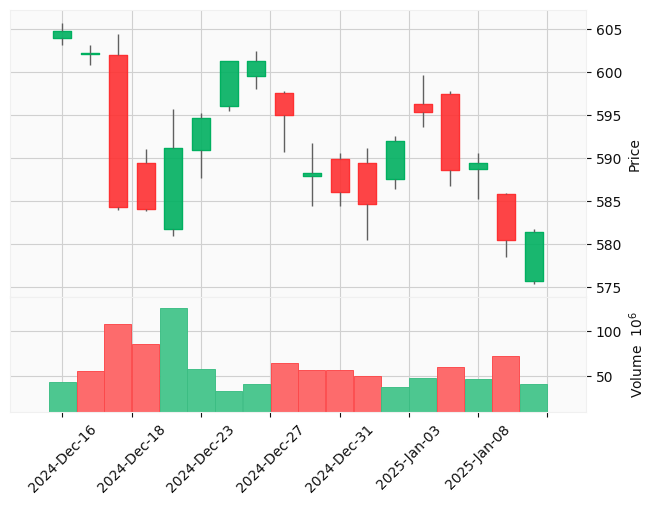

In [329]:
mpf.plot(spy.history(),type='candle',style='yahoo',volume=True)

In [330]:
data = yf.download(ticker_list, period='1mo')
data.head()

[*********************100%***********************]  4 of 4 completed


Price           Close                                       High             \
Ticker            EWJ     FTAL.L   S600.L         SPY        EWJ     FTAL.L   
Date                                                                          
2024-12-13        NaN  69.260002  10453.0         NaN        NaN  69.435600   
2024-12-16  68.116005  69.089996  10391.0  604.754578  68.273540  70.220001   
2024-12-17  67.879997  68.360001  10339.0  602.262939  68.110001  68.599998   
2024-12-18  66.180000  68.320000  10340.0  584.313416  68.000000  68.709999   
2024-12-19  66.389999  67.709999  10199.0  584.133972  66.900002  68.000000   

Price                                  Low                           \
Ticker       S600.L         SPY        EWJ     FTAL.L        S600.L   
Date                                                                  
2024-12-13  10484.0         NaN        NaN  69.080002  10461.108398   
2024-12-16  10502.0  605.741308  67.997848  68.929626  10396.000000   
2024-12-17  10360.0  603.139992  67.739998  68.269997  10324.000000   
2024-12-18  10364.0  604.375836  66.150002  68.260002  10340.000000   
2024-12-19  10226.0  591.010851  66.120003  67.437332  10166.000000   

Price                        Open                                     Volume  \
Ticker             SPY        EWJ     FTAL.L   S600.L         SPY        EWJ   
Date                                                                           
2024-12-13         NaN        NaN  69.080002  10484.0         NaN        NaN   
2024-12-16  603.179921  68.017544  69.250000  10502.0  603.967249  3234000.0   
2024-12-17  600.867672  67.800003  68.440002  10328.0  602.163299  3230800.0   
2024-12-18  583.924709  67.889999  68.570000  10364.0  601.953994  4300800.0   
2024-12-19  583.884811  66.820000  68.000000  10198.0  589.376338  4716000.0   

Price                                     
Ticker       FTAL.L  S600.L          SPY  
Date                                      
2024-12-13   1320.0   559.0          NaN  
2024-12-16  10221.0  1091.0   43695200.0  
2024-12-17   8070.0   388.0   55773500.0  
2024-12-18   5520.0   599.0  108248700.0  
2024-12-19   7086.0  1068.0   85919500.0

In [331]:
data

Price           Close                                       High             \
Ticker            EWJ     FTAL.L   S600.L         SPY        EWJ     FTAL.L   
Date                                                                          
2024-12-13        NaN  69.260002  10453.0         NaN        NaN  69.435600   
2024-12-16  68.116005  69.089996  10391.0  604.754578  68.273540  70.220001   
2024-12-17  67.879997  68.360001  10339.0  602.262939  68.110001  68.599998   
2024-12-18  66.180000  68.320000  10340.0  584.313416  68.000000  68.709999   
2024-12-19  66.389999  67.709999  10199.0  584.133972  66.900002  68.000000   
2024-12-20  66.209999  67.510002  10144.0  591.150024  66.839996  67.757401   
2024-12-23  66.489998  67.660004  10174.0  594.690002  66.550003  67.849998   
2024-12-24  66.449997  68.089996  10193.0  601.299988  66.529999  68.379997   
2024-12-26  67.220001        NaN      NaN  601.340027  67.309998        NaN   
2024-12-27  67.730003  68.055000  10218.0  595.010010  67.940002  68.279999   
2024-12-30  67.160004  67.875000  10185.0  588.219971  67.400002  68.080002   
2024-12-31  67.099998  68.349998  10243.0  586.080017  67.489998  68.489998   
2025-01-02  67.010002  69.040001  10318.0  584.640015  67.459999  69.040001   
2025-01-03  67.279999  68.599998  10265.0  591.950012  67.389999  69.010002   
2025-01-06  67.430000  68.745003  10382.0  595.359985  67.870003  68.772621   
2025-01-07  67.269997  68.599998  10409.0  588.630005  67.940002  68.980003   
2025-01-08  67.099998  68.440002  10428.0  589.489990  67.150002  68.685501   
2025-01-09        NaN  69.010002  10514.0         NaN        NaN  69.010002   
2025-01-10  65.239998  68.364998  10447.0  580.489990  65.779999  69.160004   
2025-01-13  65.419998  68.160004  10393.0  581.390015  65.440002  68.470001   

Price                                       Low                           \
Ticker            S600.L         SPY        EWJ     FTAL.L        S600.L   
Date                                                                       
2024-12-13  10484.000000         NaN        NaN  69.080002  10461.108398   
2024-12-16  10502.000000  605.741308  67.997848  68.929626  10396.000000   
2024-12-17  10360.000000  603.139992  67.739998  68.269997  10324.000000   
2024-12-18  10364.000000  604.375836  66.150002  68.260002  10340.000000   
2024-12-19  10226.000000  591.010851  66.120003  67.437332  10166.000000   
2024-12-20  10145.447266  595.750000  65.720001  66.949997  10039.461914   
2024-12-23  10175.463867  595.299988  65.839996  67.400002  10133.571289   
2024-12-24  10226.000000  601.340027  66.309998  67.839996  10226.000000   
2024-12-26           NaN  602.479980  66.930000        NaN           NaN   
2024-12-27  10232.266602  597.780029  67.449997  67.834602  10224.000000   
2024-12-30  10240.000000  591.739990  66.910004  67.669998  10142.000000   
2024-12-31  10243.000000  590.640015  66.989998  67.876503  10243.000000   
2025-01-02  10334.000000  591.130005  66.809998  67.980003  10236.000000   
2025-01-03  10276.000000  592.599976  66.809998  68.519997  10276.000000   
2025-01-06  10380.000000  599.700012  67.339996  68.349998  10278.000000   
2025-01-07  10390.000000  597.750000  67.180000  68.290001  10330.000000   
2025-01-08  10432.000000  590.580017  66.669998  68.110001  10386.000000   
2025-01-09  10520.000000         NaN        NaN  68.230003  10510.000000   
2025-01-10  10522.000000  585.950012  65.150002  68.300003  10456.000000   
2025-01-13  10424.000000  581.750000  64.711998  67.903000  10368.000000   

Price                        Open                                       \
Ticker             SPY        EWJ     FTAL.L        S600.L         SPY   
Date                                                                     
2024-12-13         NaN        NaN  69.080002  10484.000000         NaN   
2024-12-16  603.179921  68.017544  69.250000  10502.000000  603.967249   
2024-12-17  600.867672  67.800003  68.440002  10328.000000  602

In [326]:
# ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
spy_df = spy.history(period='1y')
footsie_df = footsie.history(period='1y')
stoxx_df = stoxx.history(period='1y')
nikkei_df = nikkei.history(period='1y')

In [327]:
nikkei_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-01-16 00:00:00-05:00,65.006347,65.074764,64.302624,64.449234,11987500,0.0,0.0,0.0
2024-01-17 00:00:00-05:00,63.481611,63.667318,63.286136,63.647774,10639400,0.0,0.0,0.0
2024-01-18 00:00:00-05:00,63.911663,64.263525,63.872567,64.243980,11142900,0.0,0.0,0.0
2024-01-19 00:00:00-05:00,64.077824,64.410141,63.804155,64.410141,11184400,0.0,0.0,0.0
2024-01-22 00:00:00-05:00,65.055211,65.338655,64.986794,65.172501,8696500,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-01-06 00:00:00-05:00,67.430000,67.870003,67.339996,67.430000,5238700,0.0,0.0,0.0
2025-01-07 00:00:00-05:00,67.879997,67.940002,67.180000,67.269997,4052300,0.0,0.0,0.0
2025-01-08 00:00:00-05:00,66.830002,67.150002,66.669998,67.099998,3607300,0.0,0.0,0.0


In [323]:
pd.concat([spy_df,footsie_df,stoxx_df,nikkei_df], axis=0)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-01-16 00:00:00-05:00,469.240907,470.573785,467.068758,468.915070,85014900,0.0,0.0,0.0
2024-01-17 00:00:00-05:00,465.844484,466.802200,463.919168,466.308533,68843900,0.0,0.0,0.0
2024-01-18 00:00:00-05:00,468.006720,471.018080,466.436861,470.455292,91856200,0.0,0.0,0.0
2024-01-19 00:00:00-05:00,471.600608,476.606404,470.504680,476.320068,110733300,0.0,0.0,0.0
2024-01-22 00:00:00-05:00,477.880145,479.074813,476.665712,477.327240,75844900,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-01-07 00:00:00+00:00,10356.000000,10390.000000,10330.000000,10409.000000,1402,0.0,0.0,0.0
2025-01-08 00:00:00+00:00,10386.000000,10432.000000,10386.000000,10428.000000,2609,0.0,0.0,0.0
2025-01-09 00:00:00+00:00,10520.000000,10520.000000,10510.000000,10514.000000,81,0.0,0.0,0.0


In [313]:
spy_df['daily_return'] = spy_df['Close'].pct_change()
# Drop the first row as it will have NaN value for daily return
df = df.dropna()

In [314]:
df['daily_return'].plot()

KeyError: 'daily_return'

Text(0.5, 1.0, 'S&P500 daily returns 10yrs')

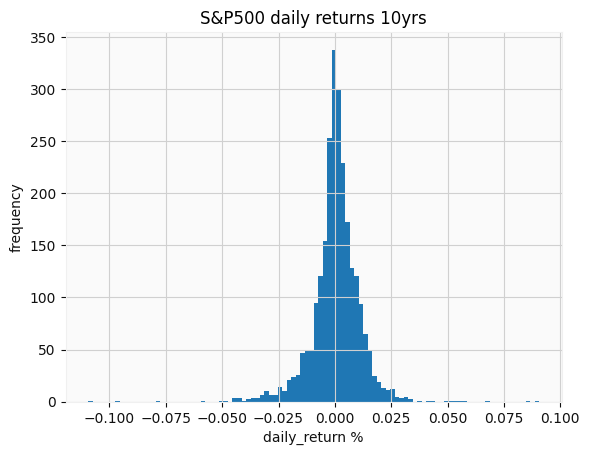

In [270]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(df['daily_return'],bins=100)
plt.xlabel('daily_return %')
plt.ylabel('frequency')
plt.title('S&P500 daily returns 10yrs')

In [272]:
df['daily_return'].mean()
df['daily_return'].median()

0.0005985561538487394

### fit distributions

In [274]:
import scipy.stats as stats
import seaborn as sns

In [275]:
data = df['daily_return']

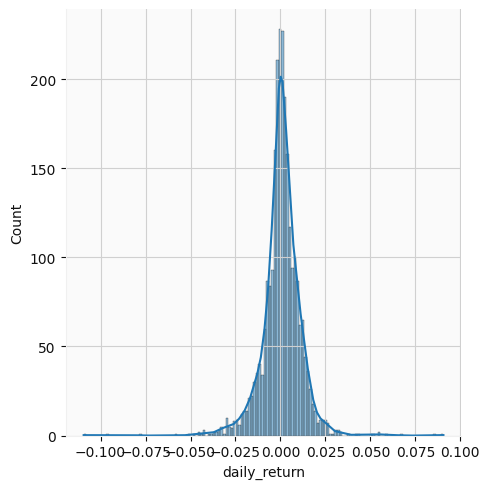

In [294]:
sns.displot(data, kde=True)
plt.show()

In [ ]:
# https://erdogant.github.io/distfit/pages/html/Examples.html#plot-rss

In [284]:
from distfit import distfit

In [285]:
# Initialize distfit
dist = distfit()

# Determine best-fitting probability distribution for data
dist.fit_transform(data)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 3568.62] [loc=0.001 scale=0.011]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 23986.2] [loc=-0.109 scale=0.110]
[distfit] >INFO> [pareto    ] [0.08 sec] [RSS: 23996.5] [loc=-4859418.993 scale=4859418.884]
[distfit] >INFO> [dweibull  ] [0.03 sec] [RSS: 365.78] [loc=0.001 scale=0.007]
[distfit] >INFO> [t         ] [0.03 sec] [RSS: 604.779] [loc=0.001 scale=0.006]
[distfit] >INFO> [genextreme] [0.17 sec] [RSS: 25505.8] [loc=-0.008 scale=0.132]
[distfit] >INFO> [gamma     ] [0.05 sec] [RSS: 26105.7] [loc=-0.109 scale=2.010]
[distfit] >INFO> [lognorm   ] [0.10 sec] [RSS: 3571.42] [loc=-4.353 scale=4.353]
[distfit] >INFO> [beta      ] [0.10 sec] [RSS: 3527.39] [loc=-91.572 scale=92.221]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 22068.6] [loc=-0.109 scale=0.200]
[distfit] >INFO> [loggamma  ] [0.06 sec] [RSS: 3507.17] [loc=-0.720 scale=0.141]
[distfit] >INFO> [norm      ] [0.68 sec] [RSS: 3568

{'model': {'name': 'dweibull',
  'score': 365.7796845763114,
  'loc': 0.0005904905389884087,
  'scale': 0.007055174692376698,
  'arg': (0.9431161202842117,),
  'params': (0.9431161202842117, 0.0005904905389884087, 0.007055174692376698),
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x15ead1592b0>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': -0.016492757032931942,
  'CII_max_alpha': 0.01767373811090876},
 'summary':           name         score             loc           scale  \
 0     dweibull    365.779685         0.00059        0.007055   
 1            t    604.778712        0.000898        0.006408   
 2     loggamma   3507.172749       -0.720076        0.141382   
 3         beta   3527.386874      -91.571598       92.220844   
 4         norm   3568.623345        0.000552         0.01109   
 5      lognorm   3571.422035       -4.352592        4.353128   
 6      uniform  22068.594086       -0.109424        0.200027   
 7

In [286]:
# Print summary of evaluated distributions
print(dist.summary)

          name         score             loc           scale  \
0     dweibull    365.779685         0.00059        0.007055   
1            t    604.778712        0.000898        0.006408   
2     loggamma   3507.172749       -0.720076        0.141382   
3         beta   3527.386874      -91.571598       92.220844   
4         norm   3568.623345        0.000552         0.01109   
5      lognorm   3571.422035       -4.352592        4.353128   
6      uniform  22068.594086       -0.109424        0.200027   
7        expon  23986.173092       -0.109424        0.109976   
8       pareto   23996.48606 -4859418.993449  4859418.884025   
9   genextreme  25505.830761       -0.008111        0.132392   
10       gamma  26105.723424       -0.109424        2.010032   

                                        arg  \
0                     (0.9431161202842117,)   
1                     (2.6962627302155218,)   
2                     (164.03492546894967,)   
3   (482470.5215709516, 3417.8300182667363)

[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Dweibull(loc:0.000590, scale:0.007055)


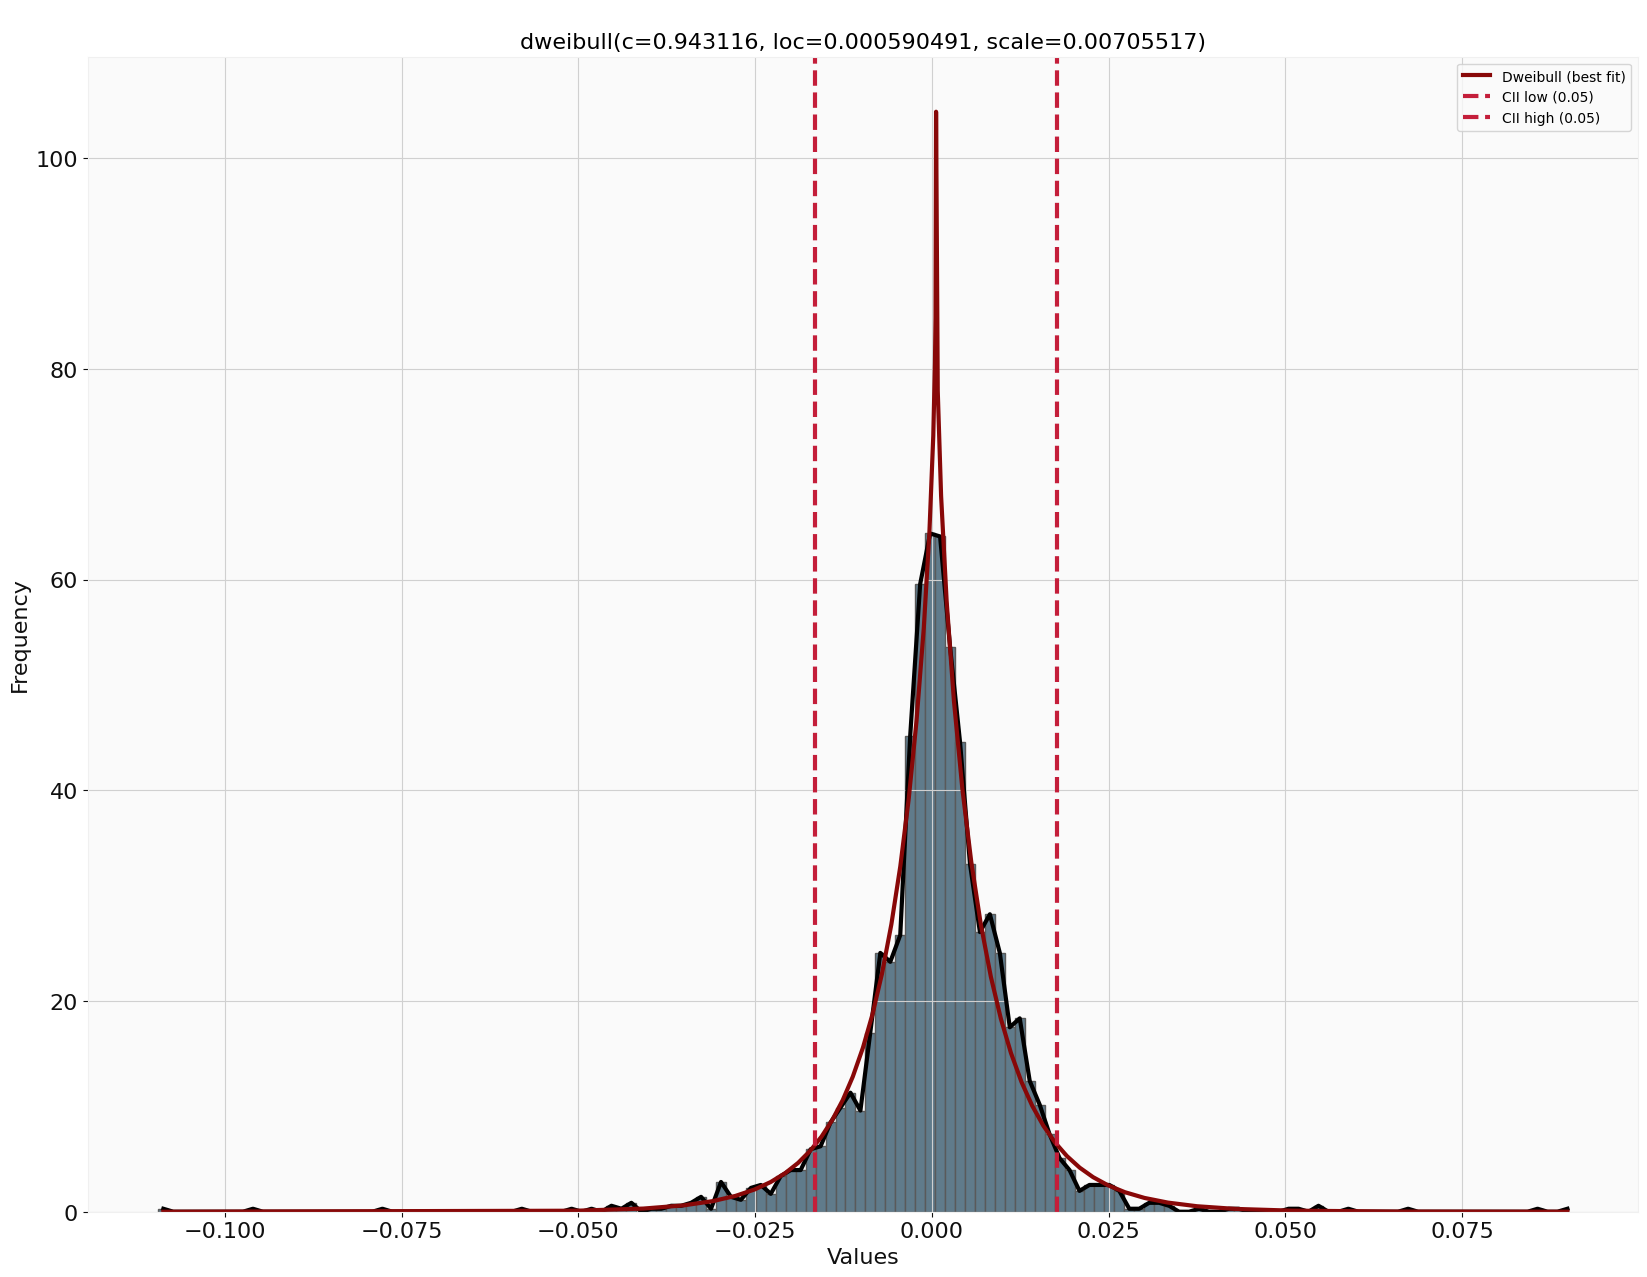

In [289]:
# Plot results
dist.plot()
plt.show()

[distfit] >INFO> Ploting Summary.


(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Dweibull (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

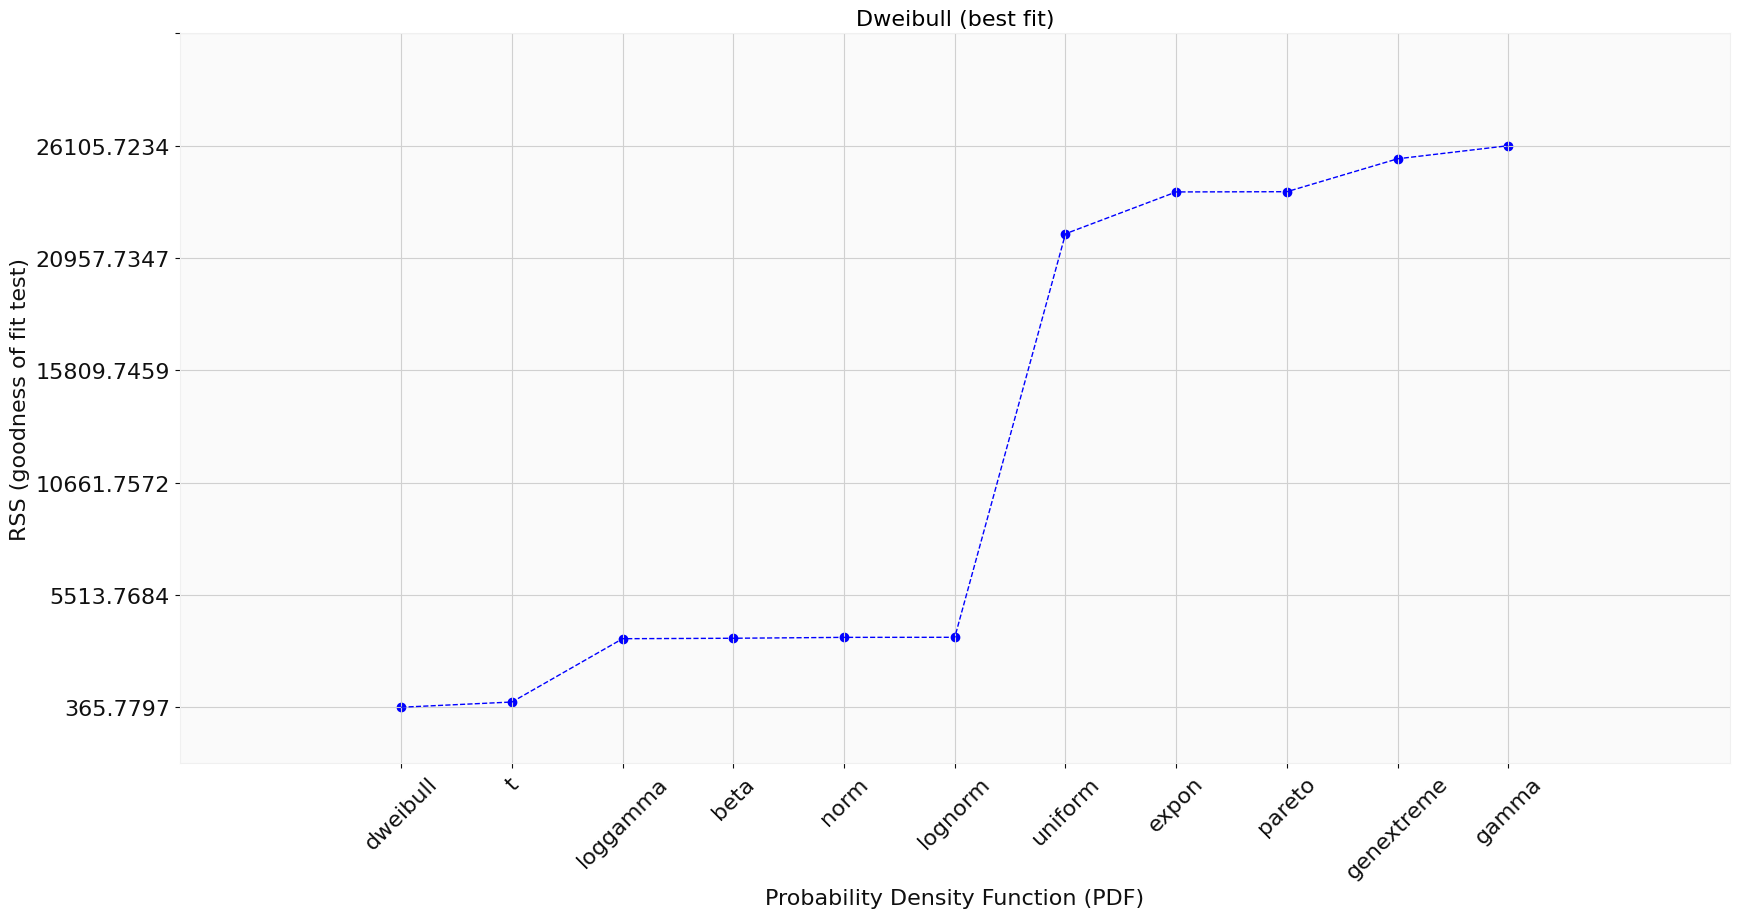

In [291]:
dist.plot_summary()

In [213]:
# get list of quotes
quotes = yf.Search("AAPL", max_results=10).quotes
quotes

[{'exchange': 'NMS',
  'shortname': 'Apple Inc.',
  'quoteType': 'EQUITY',
  'symbol': 'AAPL',
  'index': 'quotes',
  'score': 3970000.0,
  'typeDisp': 'Equity',
  'longname': 'Apple Inc.',
  'exchDisp': 'NASDAQ',
  'sector': 'Technology',
  'sectorDisp': 'Technology',
  'industry': 'Consumer Electronics',
  'industryDisp': 'Consumer Electronics',
  'dispSecIndFlag': True,
  'isYahooFinance': True},
 {'exchange': 'NGM',
  'shortname': 'Direxion Daily AAPL Bull 2X Sha',
  'quoteType': 'ETF',
  'symbol': 'AAPU',
  'index': 'quotes',
  'score': 20012.0,
  'typeDisp': 'ETF',
  'longname': 'Direxion Daily AAPL Bull 2X Shares',
  'exchDisp': 'NASDAQ',
  'isYahooFinance': True},
 {'exchange': 'OPR',
  'shortname': 'AAPL Dec 2025 70.000 call',
  'quoteType': 'OPTION',
  'symbol': 'AAPL251219C00070000',
  'index': 'quotes',
  'score': 20005.0,
  'typeDisp': 'Option',
  'longname': 'AAPL Dec 2025 70.000 call',
  'exchDisp': 'OPR',
  'isYahooFinance': True},
 {'exchange': 'OPR',
  'shortname': 'A

In [198]:
spy.funds_data.description

'The trust seeks to achieve its investment objective by holding a portfolio of the common stocks that are included in the index, with the weight of each stock in the portfolio substantially corresponding to the weight of such stock in the index.'

In [199]:
spy.funds_data.sector_weightings

{'realestate': 0.021,
 'consumer_cyclical': 0.1142,
 'basic_materials': 0.0167,
 'consumer_defensive': 0.0552,
 'technology': 0.33720002,
 'communication_services': 0.0937,
 'financial_services': 0.13159999,
 'utilities': 0.0251,
 'industrials': 0.0726,
 'energy': 0.031600002,
 'healthcare': 0.101}

In [200]:
spy.funds_data.asset_classes

{'cashPosition': 0.0031,
 'stockPosition': 0.997,
 'bondPosition': 0.0,
 'preferredPosition': 0.0,
 'convertiblePosition': 0.0,
 'otherPosition': 0.0}

In [201]:
spy.funds_data.bond_holdings

,SPY,Category Average
Average,,
Duration,<NA>,<NA>
Maturity,<NA>,<NA>
Credit Quality,<NA>,<NA>


In [202]:
spy.funds_data.bond_ratings

{'us_government': 0.0}

In [173]:
import yfinance as yf
import pandas as pd

tickerStrings = ['AAPL', 'MSFT']
df_list = []
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker")
    data['ticker'] = ticker  # Add ticker column
    df_list.append(data)

# Combine all dataframes into a single dataframe
df = pd.concat(df_list)
df.to_csv('ticker.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [174]:
df

Ticker          AAPL                                            ticker  \
Price           Open      High       Low     Close       Volume          
Date                                                                     
1980-12-12  0.098834  0.099264  0.098834  0.098834  469033600.0   AAPL   
1980-12-15  0.094108  0.094108  0.093678  0.093678  175884800.0   AAPL   
1980-12-16  0.087232  0.087232  0.086802  0.086802  105728000.0   AAPL   
1980-12-17  0.088951  0.089381  0.088951  0.088951   86441600.0   AAPL   
1980-12-18  0.091530  0.091959  0.091530  0.091530   73449600.0   AAPL   
...              ...       ...       ...       ...          ...    ...   
2025-01-03       NaN       NaN       NaN       NaN          NaN   MSFT   
2025-01-06       NaN       NaN       NaN       NaN          NaN   MSFT   
2025-01-07       NaN       NaN       NaN       NaN          NaN   MSFT   
2025-01-08       NaN       NaN       NaN       NaN          NaN   MSFT   
2025-01-10       NaN       NaN       NaN       NaN          NaN   MSFT   

Ticker            MSFT                                                  
Price             Open        High         Low       Close      Volume  
Date                                                                    
1980-12-12         NaN         NaN         NaN         NaN         NaN  
1980-12-15         NaN         NaN         NaN         NaN         NaN  
1980-12-16         NaN         NaN         NaN         NaN         NaN  
1980-12-17         NaN         NaN         NaN         NaN         NaN  
1980-12-18         NaN         NaN         NaN         NaN         NaN  
...                ...         ...         ...         ...         ...  
2025-01-03  421.079987  424.029999  419.540009  423.350006  16662900.0  
2025-01-06  428.000000  434.320007  425.480011  427.850006  20573600.0  
2025-01-07  429.000000  430.649994  420.799988  422.369995  18139100.0  
2025-01-08  423.459991  426.970001  421.540009  424.559998  15054600.0  
2025-01-10  424.630005  424.709991  415.019989  418.950012  20186800.0  

[20896 rows x 11 columns]

In [214]:
tech = yf.Sector('technology')
software = yf.Industry('software-infrastructure')

# Common information
tech.key
tech.name
tech.symbol
tech.ticker
tech.overview
tech.top_companies
tech.research_reports

# Sector information
tech.top_etfs
tech.top_mutual_funds
tech.industries

# Industry information
software.sector_key
software.sector_name
software.top_performing_companies
software.top_growth_companies

,name,ytd return,growth estimate
symbol,,,
CFLT,"Confluent, Inc.",-0.0114,5.500000
AVDX,"AvidXchange Holdings, Inc.",-0.0687,3.000000
OSPN,OneSpan Inc.,-0.0140,2.000000
GB,Global Blue Group Holding AG,0.0750,1.809818
IOT,Samsara Inc.,0.0021,1.428571


In [215]:
tech.top_etfs

{'VGT': 'Vanguard Information Tech ETF',
 'XLK': 'SPDR Select Sector Fund - Techn',
 'SMH': 'VanEck Semiconductor ETF',
 'IYW': 'iShares U.S. Technology ETF',
 'SOXX': 'iShares Semiconductor ETF',
 'FTEC': 'Fidelity MSCI Information Techn',
 'SOXL': 'Direxion Daily Semiconductor Bu',
 'IGV': 'iShares Expanded Tech-Software ',
 'FNGU': 'MicroSectors FANG  Index 3X Lev',
 'CIBR': 'First Trust NASDAQ Cybersecurit'}

In [216]:
tech.top_companies

,name,rating,market weight
symbol,,,
AAPL,Apple Inc.,Buy,0.189498
NVDA,NVIDIA Corporation,Buy,0.176273
MSFT,Microsoft Corporation,Buy,0.164758
AVGO,Broadcom Inc.,Buy,0.055418
ORCL,Oracle Corporation,Buy,0.022647
CRM,"Salesforce, Inc.",Buy,0.016090
CSCO,"Cisco Systems, Inc.",Buy,0.012375
ACN,Accenture plc,Buy,0.011562
NOW,"ServiceNow, Inc.",Buy,0.011182
